# Day 5: Taylor Series of Electric Potential

#### &#9989; **Write your name here**

We can use Taylor series approximations to find physical quantities very close to fixed point. This is useful because sometimes the fixed point can have nice symmetry that makes information about the physical quantity easy to know, whereas nearby the math can become very complicated very quickly. Taylor series solves this issue.

Taylor series tells us that we can write our physical quantity ($f(x)$) in terms of its derivatives at the fixed point ($x_0$):

$$f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n $$

where $f^{(n)}(x_0)$ is the $n$th derivative of $f$ at the point $x_0$.

In Day 4, we found the $n$th derivative of $f(z) = (1 + z)^p$:

$$f^\text{(n)}(z) = p(p-1)(p-2)\ldots(p-n+1)(1+z)^{p-n}$$

&#9989; **Task 0.1:** The code below is a function to compute $f^\text{(n)}(z_0)$, with the constant parameter $p=-\frac{1}{2}$. Read through the function and **add documentation and comments** as indicated to explain how the function works.

In [4]:
# fn: computes the nth derivative of f at z0
# inputs:
# output:
def fn(z0, n, p=-1/2):
    '''
    if you prefer, you can place your 
    documentation in this docstring instead
    '''
    product = 1
    # add comment to explain the line below
    for i in range(n):
        # add comment to explain the line below
        product *= (p - i)
    return product * (1 + z0) ** (p - n)

We can use $f^\text{(n)}(z_0)$ to derive the Taylor series of $f(z)$ near a fixed point $z_0$:

$$f(z) = \sum_{n=0}^{n \le N} \frac{f^\text{(n)}(z_0)}{n!} (z-z_0)^n $$

When we compute this sum using our computational resources, we can use only the first several terms ($n=0$ through $n=N$), because as $n$ gets bigger, the terms themselves become very small when $z$ is close to $z_0$. That is why we wrote $N$ on top of the sum instead of $\infty$.

---
## Part 1: Taylor series of electric potential

Let's use Taylor series to approximate the electric potential from four charges of charge $Q$ arranged in a square of sidelength $2a$ centered on the $xy$-plane. We will compute the electric potential along the $x$-axis.

<img src="https://raw.githubusercontent.com/pattihamerski/PH-36X-Public/refs/heads/main/images/four-charges.png"
     alt="Four charges of charge Q arranged in a square of sidelength 2a centered on the xy-plane"
     width="400"
/>

We can begin with a general formula for electric potential:

$$V(\vec{r}) = \sum_i \frac{k q_i}{\left|\vec{r}-\vec{r}_i\right|}$$

Then, since we know $\vec{r}$ (points along the $x$-axis), $q_i$ (all $Q$), and $\vec{r_i}$ (the four locations in the square shown above), we can begin to flesh out an expression for potential along the $x$-axis, which we define as $V_x$:

$$\begin{align}
V_x(x) := V(\langle x, 0, 0 \rangle) &= \sum_i \frac{k Q}{\left|\langle x, 0, 0 \rangle-\vec{r}_i\right|} \\
&= \frac{k Q}{\left|\langle x+a, a, 0 \rangle\right|} + \frac{k Q}{\left|\langle x+a, -a, 0 \rangle\right|} + \frac{k Q}{\left|\langle x-a, -a, 0 \rangle\right|} + \frac{k Q}{\left|\langle x-a, a, 0 \rangle\right|} \\
&= \frac{2kQ}{\left((x+a)^2 + a^2\right)^\frac{1}{2}} + \frac{2kQ}{\left((x-a)^2 + a^2\right)^\frac{1}{2}} \\
&= \frac{2kQ}{a}\left(\left(\left(\frac{x}{a}+1\right)^2 + 1\right)^{-\frac{1}{2}} + \left(\left(\frac{x}{a}-1\right)^2 + 1\right)^{-\frac{1}{2}}\right)
\end{align}$$

We leave the expression in wonky-looking state so that we can perform the following substitutions:

$$u := \left(\frac{x}{a}+1\right)^2,\text{ }\text{ } v := \left(\frac{x}{a}-1\right)^2$$

$$ f(z) := \left(1+z\right)^p, \text{ }\text{ } p = -\frac{1}{2}$$

This results in:

$$V_x(x) = \frac{2kQ}{a}\left(f(u) + f(v)\right)$$

When we think about taking the Taylor series of this final expression, note that expanding around $u_0=1$ and $v_0=1$ is equivalent to $x_0=0$, from how $u$ and $v$ are defined.

&#9989; **Task 1.1:** The code below computes the Taylor series derived above and plots several approximations from the series, where $a = 1\text{ m}$ and $Q = 1 \cdot 10^{-10}\text{ C}$. Read through the code and **add comments** as indicated to explain how it works. Also **add additional plotting commands** to make it easier to compare the approximations near $x_0=0$ and to labels to clearly state what the visualization is showing.

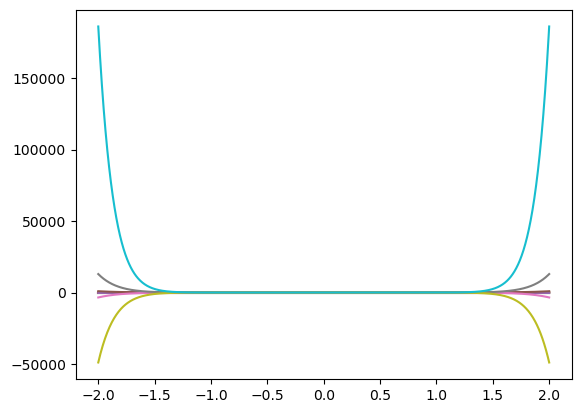

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

a = 1
k = 8.99e9
Q = 1e-10

# add comment to explain the line below
x_vals = np.linspace(-2 * a, 2 * a, 1000)
# add comment to explain the lines below
u_vals = (x_vals / a + 1) ** 2
v_vals = (x_vals / a - 1) ** 2
u0 = 1
v0 = 1

# add comment to explain the lines below
approx_fu = fn(u0, 0)
approx_fv = fn(v0, 0)

# add comment to explain the line below
N = 10

# add comment to explain the line below
for n in range(1, N + 1, 1):
    # add comment to explain the lines below
    term_fu = fn(u0, n) / math.factorial(n) * (u_vals - u0) ** n
    term_fv = fn(v0, n) / math.factorial(n) * (v_vals - v0) ** n
    # add comment to explain the lines below
    approx_fu += term_fu
    approx_fv += term_fv
    # add comment to explain the line below
    approx_Vx = 2 * k * Q / a * (approx_fu + approx_fv)
    # add comment to explain the line below
    plt.plot(x_vals, approx_Vx, label="n ≤ %d"%n)

# add code to improve the plot
plt.show()

#### &#128721; **Stop here and check in with an instructor.**

&#9989; **Task 1.2:** Modify the code again to **increase the number of terms** in the Taylor series as high as you can go. Visually estimate the **radius of convergence** of the series -- this is the span of $x$-values near $x_0$ for which Taylor series can compute a consistent and reliable approximation.

**/your answer here/**

---
## Part 2: Computing an exact solution

Recall our formula for $V_x$ before we converted it into a more Taylor series-friendly format:

$$V_x(x) = \frac{2kQ}{\left((x+a)^2 + a^2\right)^\frac{1}{2}} + \frac{2kQ}{\left((x-a)^2 + a^2\right)^\frac{1}{2}}$$

&#9989; **Task 2.1:** Compute the **exact solution** for $V_x$ and **plot it in comparison** with the provided approximations from Part 1.

*If you need to original code from Part 1, here it is again to copy as needed.*

```
a = 1
k = 8.99e9
Q = 1e-10

x_vals = np.linspace(-2 * a, 2 * a, 1000)
u_vals = (x_vals / a + 1) ** 2
v_vals = (x_vals / a - 1) ** 2
u0 = 1
v0 = 1

approx_fu = fn(u0, 0)
approx_fv = fn(v0, 0)

N = 10

for n in range(1, N + 1, 1):
    term_fu = fn(u0, n) / math.factorial(n) * (u_vals - u0) ** n
    term_fv = fn(v0, n) / math.factorial(n) * (v_vals - v0) ** n
    approx_fu += term_fu
    approx_fv += term_fv

    approx_Vx = 2 * k * Q / a * (approx_fu + approx_fv)
    plt.plot(x_vals, approx_Vx, label="n ≤ %d"%n)
```

In [6]:
# your answer here

Suppose you didn't know the charge distribution in advance. A function to compute electric potential from **any** collection of charges would be useful in that case. Along the $x$-axis, this is what our general formula for electric potential would be:

$$V_x(x) = \sum_i \frac{k q_i}{\left|\langle x, 0, 0 \rangle-\vec{r}_i\right|} = \sum_i \frac{k q_i}{\left((x-r_{i,x})^2 + r_{i,y}^2 + r_{i,z}^2\right)^\frac{1}{2}}$$

&#9989; **Task 2.2:** Document and create a function to compute $V_x$ at a location $x$ along the $x$-axis, from a list of charge values and a list of position values.

In [7]:
# your documented function here

#### &#128721; **Stop here and check in with an instructor.**

&#9989; **Task 2.3:** Use your function to **compute the electric potential** at provided $x$ values from the provided charge and position values. To verify that you function works properly, **plot your solution in comparison** to your exact solution from Task 2.1.

*Note: You don't need to include any Taylor series here. It's just a comparison of two curves.*

In [8]:
# provided charges and positions
# feel free to modify the variable structure below to match your function

a = 1
k = 8.99e9
Q = 1e-10

x_vals = np.linspace(-5, 5, 1000)
charges = [Q, Q, Q, Q]
positions = [[-a, -a, 0], [a, -a, 0], [a, a, 0], [-a, a, 0]]

In [9]:
# your answer here